<img src="img/Peoplelogy-Logo.png" style="height: 150px;" align=left> <img src="img/python-logo.png" style="height: 150px;" align=right>

# Customer Segmentation Analysis Project

<img src="img/mall.jpg" style="height: 500px; width: 1500px;" align=left>
<br>

---
### Objective
Analyze customer demographics and spending behavior using descriptive statistics, visualizations, and distribution analysis. The goal is to provide insights into customer segments and spending patterns, incorporating knowledge of central tendency, dispersion, and outlier analysis.

---

## Project Instructions
### Deliverables
- **Summary Report**: Summarize key findings for each question.
- **Visualizations**: Include all histograms, box plots, scatter plots, and bar charts created during the analysis.
- **Interpretations**: Provide written explanations for all analyses, including insights from central tendency, dispersion, and distribution analysis.


In [1]:
#Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 
from statistics import mode
from scipy.special import binom

In [2]:
sns.__version__ >= '0.9.0'
np.__version__ >= '1.15.4'
pd.__version__ >= '0.23.4'

True

---
### 1. Basic Data Exploration

#### Q1: Load and explore the dataset.
- Display the first five rows of the dataset.
- Identify and list all columns along with their data types.

In [3]:
#Load the dataset
Mall_Customers = pd.read_csv("../data/Mall_Customers.csv")

In [4]:
#First five rows of the dataset
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Data Columns and Their Data Types
- **CustomerID**: int64  
- **Gender**: object  
- **Age**: int64  
- **Annual Income (k$)**: int64  
- **Spending Score (1-100)**: int64

#### Q2: Check for any missing values in the dataset. If there are any, note which columns are affected.

In [6]:
#Checking missing values
Mall_Customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### The dataset is complete with no missing values in any column

---

### 2. Descriptive Statistics

#### Q3: Calculate and interpret the following statistics for the **Age**, **Annual Income**, and **Spending Score** columns:
   - Mean
   - Median
   - Mode
   - Standard deviation


In [7]:
#Summary statistics from .describe()
Mall_Customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### From the .describe() it shows that

##### Descriptive Statistics for **Age**
   - Mean: 38.85
   - Median: 36.00
   - Standard deviation: 13.97
     
##### Descriptive Statistics for **Annual Income**
   - Mean: 60.56
   - Median: 61.50
   - Standard deviation: 26.26

##### Descriptive Statistics for **Spending Score**
   - Mean: 50.20
   - Median: 50.00
   - Standard deviation: 25.82

In [8]:
#To calculate the mode
print(f"""
Age, Mode: {Mall_Customers['Age'].mode()[0]}
Annual Income, Mode: {Mall_Customers['Annual Income (k$)'].mode()[0]}
Spending Score, Mode: {Mall_Customers['Spending Score (1-100)'].mode()[0]}
""")


Age, Mode: 32
Annual Income, Mode: 54
Spending Score, Mode: 42



##### All values for Mean, Median, Mode and Standard Deviation for the **Age**, **Annual Income**, and **Spending Score** columns and their Interpretation:

##### **1) Age**
   - Mean: 38.85
       - The mean age of customers is 38.85 years. This represents the average age of all the customers in the dataset.
   - Median: 36.00
       - The median is 36, which means that half of the customers are younger than 36 years and half are older.
   - Mode: 32
       - The mode of 32 means that 32 years is the most frequent age among the customers. This is the value that occurs the most in the dataset.
   - Standard deviation: 13.97
       - The standard deviation is 13.97 years. This indicates how much the ages of customers deviate from the mean age of 38.85. A larger standard deviation means more variability in ages, and a smaller standard deviation means the ages are more concentrated around the mean. Since the standard deviation is about 14 years, it shows that most of the customers' ages fall within a range of approximately 24 to 53 years (38.85 ± 13.97).
     
##### **2) Annual Income**
   - Mean: 60.56
       - The mean annual income is \\$60.56k. On average, customers earn \\$60,560 annually.
   - Median: 61.50
       - The median income is \\$61.50k, which suggests that half of the customers earn less than \\$61,500 and half earn more.
   - Mode: 54
       - The mode of \\$54k means that \\$54,000 is the most common annual income in the dataset. It's the income value that appears most frequently among the customers.
   - Standard deviation: 26.26
       - The standard deviation is 26.26k. This means there is considerable variability in annual incomes, with some customers earning much more or less than the mean. A standard deviation of 26.26 suggests that most incomes are spread across a wide range, indicating a relatively diverse group of customers in terms of income levels.

##### **3) Spending Score**
   - Mean: 50.20
       - The mean spending score is 50.20, indicating that on average, customers have a spending score just above the midpoint of the possible range (which is 50). This suggests a relatively balanced distribution of spending behavior among customers.
   - Median: 50.00
       - The median spending score is 50, meaning that half of the customers have a spending score less than 50 and half have a score greater than 50. Since the mean and median are very close, it suggests that the distribution of spending scores is fairly symmetric without significant skewness.
   - Mode: 42
       - The mode of 42 indicates that the most frequent spending score among customers is 42. This score occurs more often than any other spending score in the dataset.
   - Standard deviation: 25.82
       - The standard deviation for spending score is 25.82, which is relatively high. This indicates a wide variation in customers' spending habits, with scores ranging from low to high. A standard deviation this large suggests that the spending behavior of the customers varies significantly.

---

### 3. Distribution Analysis

#### Q4(a): Examine the **Age** distribution using a histogram. Describe whether it appears normally distributed, skewed, or has any outliers.


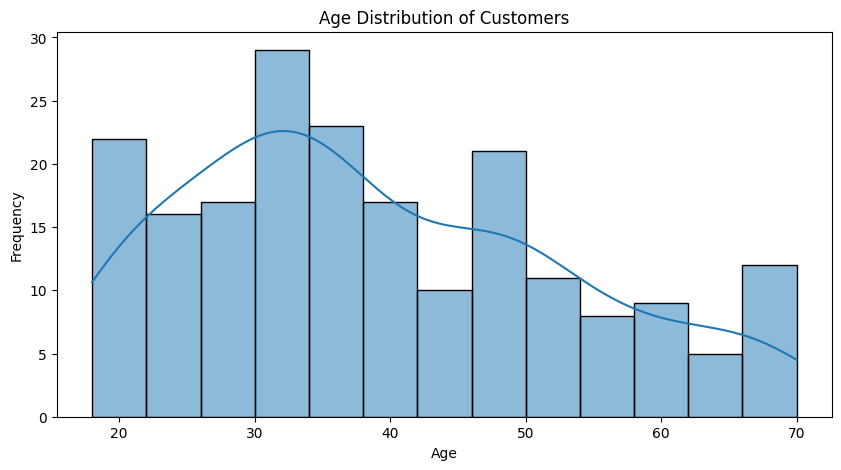

In [9]:
#Plotting the Age distribution using histogram
plt.figure(figsize=(10, 5))
sns.histplot(Mall_Customers['Age'], kde=True, bins=13)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### The distribution shape of the histogram for Age distributions shows that it has a longer tail on the right, so it is right-skewed (Positively Skewed) which most customers are younger, but there are a few older customers whose ages are significantly higher than the majority.

***

#### Q4(b): Examine the **Annual Income** distribution using a histogram. Describe whether it appears normally distributed, skewed, or has any outliers.

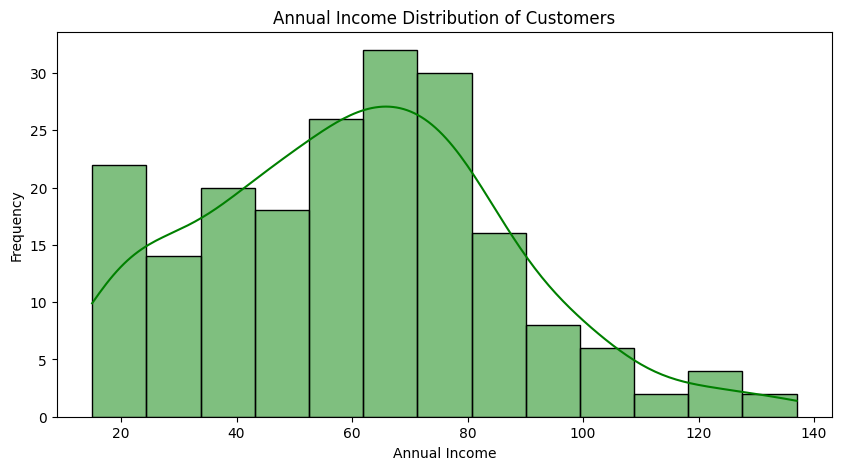

In [10]:
#Plotting the Annual Income distribution using a histogram
plt.figure(figsize=(10, 5))
sns.histplot(Mall_Customers['Annual Income (k$)'], kde=True, bins=13, color='green')
plt.title('Annual Income Distribution of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

##### The distribution shape of the histogram for **Annual Income** distributions also shows that it has a longer tail on the right, so it is right-skewed (Positively Skewed), meaning that most customers have relatively lower or moderate incomes, with a few customers earning significantly higher amounts.

---

#### Q5: Calculate the **skewness** and **kurtosis** for the **Annual Income** and **Spending Score** columns. Interpret the results.

In [11]:
#To calculate skewness for the Annual Income and Spending Score
Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']].skew(axis=0)

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

##### Since the value of skewness for **Annual Income** is positive (greater than 0), it indicates a right-skewed distribution. This means that most customers have lower incomes, with the distribution tailing off towards higher income levels.
##### Since the value of skewness for **Spending Score** is negative (less than 0), it suggests a left-skewed distribution. A Spending Score value of **-0.04** shows a very slight negative skew. This implies that the distribution is nearly symmetrical, with only a small concentration of data towards the higher spending scores and a minor tail extending toward the lower spending values.

In [12]:
#To calculate kurtosis for the Annual Income and Spending Score
Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']].kurtosis(axis=0)

Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

##### For **Annual Income**, the kurtosis value for annual income is negative (less than 0) which suggests that the distribution of income is platykurtic
##### For **Spending Score**, the kurtosis value for spending score is negative (less than 0) which suggests that the distribution of income is platykurtic also

### 4. Exploring Relationships Between Variables

#### Q6: Use a **box plot** to compare the **Spending Score** distribution for **Male** and **Female** customers. What can you infer about the spending patterns?


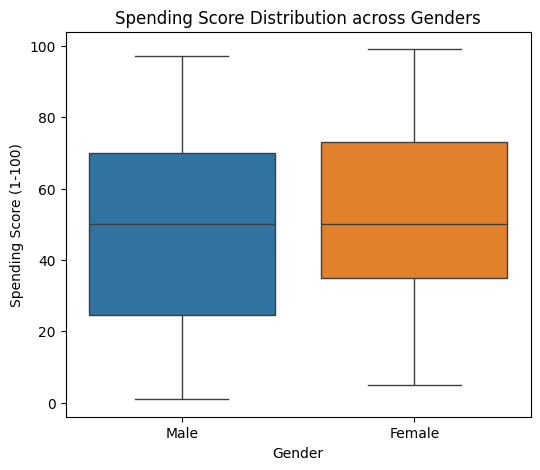

In [13]:
# Plotting the comparison of spending score distribution for male and female customers using box plot
plt.figure(figsize=(6, 5))
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data= Mall_Customers, hue= 'Gender')
plt.title('Spending Score Distribution across Genders')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

##### The higher median for females suggests that, on average, they spend more, while the smaller IQR indicates that their spending habits are more similar and less spread out (smaller IQR). In other words, females have higher but more consistent spending.

#### Q7: Use a **scatter plot** to examine the relationship between **Annual Income** and **Spending Score**. Calculate the Pearson correlation coefficient and interpret the relationship.


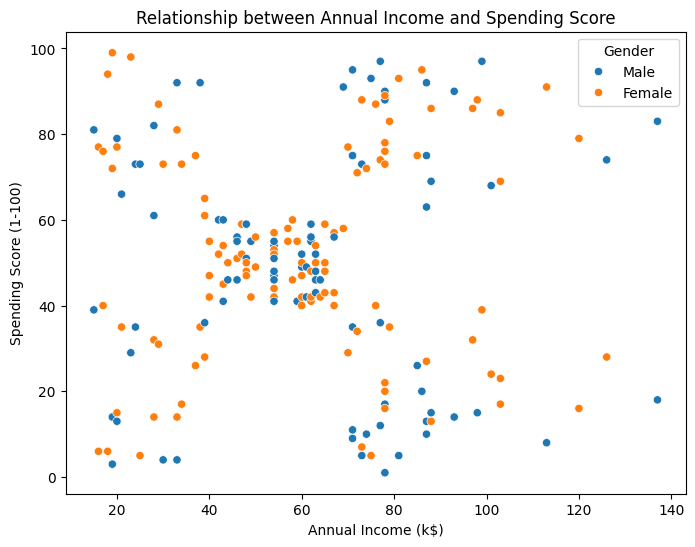

In [14]:
# Plotting the relationship between Annual Income and Spending Score using scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender",data=Mall_Customers)
plt.title("Relationship between Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [15]:
df=pd.DataFrame(Mall_Customers)
df[['Spending Score (1-100)', 'Annual Income (k$)']].corr()

,Spending Score (1-100),Annual Income (k$)
Spending Score (1-100),1.000000,0.009903
Annual Income (k$),0.009903,1.000000


<Axes: >

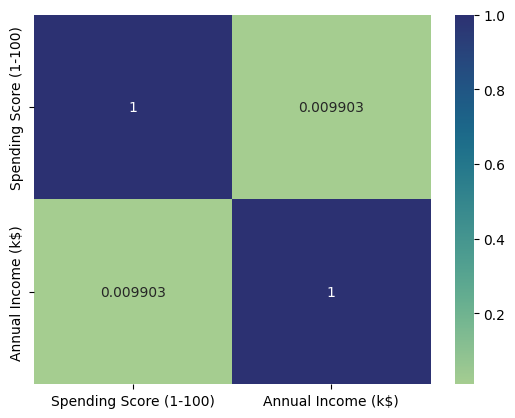

In [16]:
sns.heatmap(df[['Spending Score (1-100)', 'Annual Income (k$)']].corr(),annot=True,fmt='.4g', cmap='crest')

##### The Pearson Correlation Coefficient between **Annual Income** and **Spending Score** gives a value of **0.009903** which is near to zero. This indicates that no significant linear relationship betwwen the two variables as also shown on the scatter plot and other factors might influence spending behaviour.

---


### 5. Outlier Detection

#### Q8: Calculate the following for the **Age** and **Annual Income** columns:
   - Q1 (25th percentile)
   - Q3 (75th percentile)
   - Interquartile Range (IQR)
   - Lower Fence (LF)
   - Upper Fence (UF)

   Identify any outliers based on these values.


##### Outliers normally defined by these fences using Tukey's Method:
- $LF = Q1 - 1.5 \times IQR$

- $UF = Q3 + 1.5 \times IQR$

In [17]:
# to calculate the value of Q1, Q2, IQR, LF and UF for Age
Age = Mall_Customers['Age']
print(Age.sort_values())

age_q1 = Age.quantile(.25)
age_q3 = Age.quantile(.75)
age_iqr = age_q3 - age_q1

print(f"""
The first quartile is {Age.quantile(.25)}
The third quartile is {Age.quantile(.75)}
The IQR is {age_iqr}
The lower fence is {Age.quantile(.25) - 1.5 * age_iqr}
The upper fence is {Age.quantile(.75) + 1.5 * age_iqr}
""")

33     18
114    18
91     18
65     18
68     19
       ..
67     68
108    68
57     69
70     70
60     70
Name: Age, Length: 200, dtype: int64

The first quartile is 28.75
The third quartile is 49.0
The IQR is 20.25
The lower fence is -1.625
The upper fence is 79.375



##### Outlier detection for **Age**
   - Q1 (25th percentile): 28.75
   - Q3 (75th percentile): 49.00
   - Interquartile Range (IQR): 20.25
   - Lower Fence (LF): -1.625
   - Upper Fence (UF): 79.375

##### Based on the LF and UF, it shows that the lowest value of Age is 18 and the highest value is 70 in which these values are in between the lower fence (LF) and upper fence (UF) so that there are no outliers for **Age** column.

In [18]:
# to calculate the value of Q1, Q2, IQR, LF and UF for Annual Income
Annual_Income = Mall_Customers['Annual Income (k$)']
print(Annual_Income.sort_values())

income_q1 = Annual_Income.quantile(.25)
income_q3 = Annual_Income.quantile(.75)
income_iqr = income_q3 - income_q1

print(f"""
The first quartile is {Annual_Income.quantile(.25)}
The third quartile is {Annual_Income.quantile(.75)}
The IQR is {income_iqr}
The lower fence is {Annual_Income.quantile(.25) - 1.5 * income_iqr}
The upper fence is {Annual_Income.quantile(.75) + 1.5 * income_iqr}
""")

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

The first quartile is 41.5
The third quartile is 78.0
The IQR is 36.5
The lower fence is -13.25
The upper fence is 132.75



##### Outlier detection for **Annual Income**
   - Q1 (25th percentile): 41.5
   - Q3 (75th percentile): 78.0
   - Interquartile Range (IQR): 36.5
   - Lower Fence (LF): -13.25
   - Upper Fence (UF): 132.75

Based on the LF and UF, it shows that the lowest value of Annual Income is 15 and the highest value is 137 in which the highest value is above UF (137>132.75) and it is considered as outliers for **Annual Income** column. These customers might represent on the high income or high net worth individuals, who are likely to display different spending behaviors than the average customer.

---

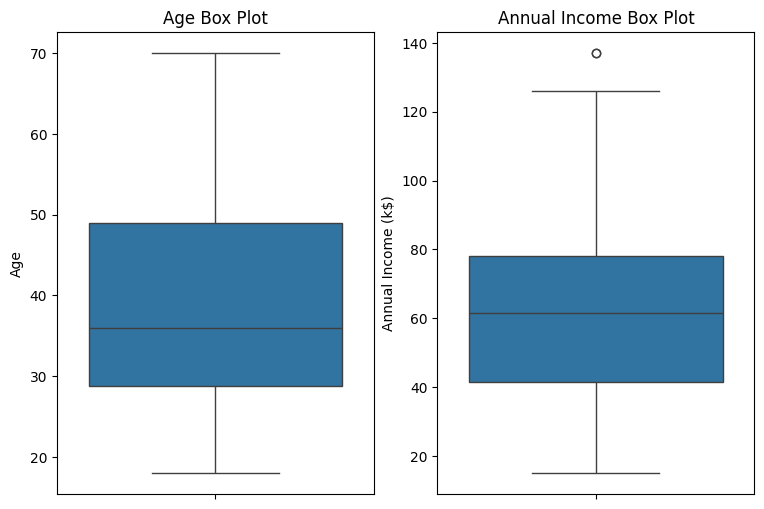

In [19]:
# To confirm the outliers by using visual tools such box plot for Age and Annual Income
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=Mall_Customers['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(y=Mall_Customers['Annual Income (k$)'])
plt.title('Annual Income Box Plot')
plt.show()

##### From the box plot above it confirms the the outliers only at the **Annual Income** column  on higher-income outliers while there are none outliers at the **Age** column.

---

### 6. Customer Segmentation Analysis

#### Q9: Group customers by **Age Group** (e.g., <20, 20-30, 30-40, etc.) and calculate the mean **Spending Score** for each group. Visualize the results in a bar chart.

   - **Hint**: Use `pd.cut()` to create age groups, and then `groupby()` to calculate average values.

In [20]:
#to create age group
bins = [0, 20, 30, 40, 50, 60, 70]
group = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
Mall_Customers['Age Group'] = pd.cut(Mall_Customers['Age'], bins=bins, labels=group)

#to calculate the mean Spending Score for each age group
age_group_spending = Mall_Customers.groupby('Age Group')[['Spending Score (1-100)']].mean()
age_group_spending

C:\Users\User\AppData\Local\Temp\ipykernel_8764\2228034623.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = Mall_Customers.groupby('Age Group')[['Spending Score (1-100)']].mean()


,Spending Score (1-100)
Age Group,
<20,44.647059
20-30,67.222222
30-40,57.500000
40-50,34.394737
50-60,32.521739
60+,44.176471


<Figure size 1000x800 with 0 Axes>

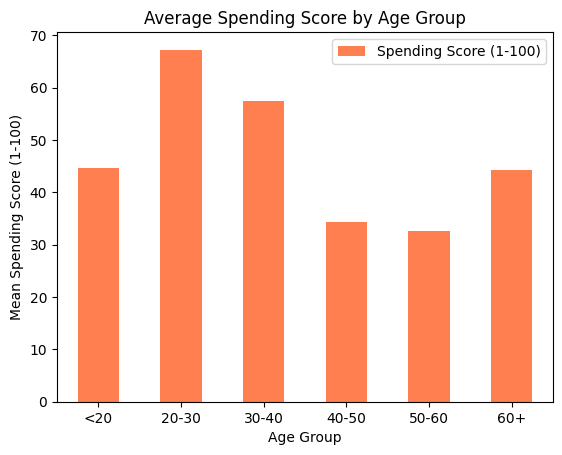

In [21]:
#to visualize the results in a bar chart
plt.figure(figsize=(10, 8))
age_group_spending.plot(kind='bar', color='#FF7F50')
plt.title('Average Spending Score by Age Group')
plt.ylabel('Mean Spending Score (1-100)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()

##### From mean Spending Score for each age group shows that younger adults (20-30) have the highest spending scores, possibly due to higher income levels or they tend to spend more on fun and lifestyle, while older adults spend less as they focus on savings, family, and other responsibilities.


### 10. Examine Gender-Based Spending Habits
   - **Question**: Calculate the average **Spending Score** and **Annual Income** for each gender. Does one gender tend to spend more on average?
   - **Hint**: Use `groupby()` on the gender column 


In [22]:
#groupby Gender and to calculate the average Spending Score and Annual Income
Mall_Customers.groupby('Gender')[['Spending Score (1-100)', 'Annual Income (k$)']].mean()

,Spending Score (1-100),Annual Income (k$)
Gender,,
Female,51.526786,59.250000
Male,48.511364,62.227273


##### From the DataFrame above, it shows the average Spending Score and Annual Income for each gender. Females have higher average Spending Score than males, it indicates that they tend to spend more on average while males have a higher average Annual Income, this may suggest a greater earning potential; however, it does not necessarily correlate with higher spending.

***

### 11. Calculate Z-scores for Spending Score
   - **Question**: Calculate the Z-scores for the **Spending Score** column to identify which customers have exceptionally high or low spending scores. Highlight any customers with Z-scores greater than 2 or less than -2.
   - **Hint**: Z-score can be calculated as `(value - mean) / std`.

In [23]:
# to calculate the Z-scores for the Spending Score column
df['Z-Score'] = (df['Spending Score (1-100)'] - df['Spending Score (1-100)'].mean()) / df['Spending Score (1-100)'].std()
df[['Spending Score (1-100)', 'Z-Score']].head()

,Spending Score (1-100),Z-Score
0,39,-0.433713
1,81,1.192711
2,6,-1.711618
3,77,1.037814
4,40,-0.394989


In [24]:
#to highlight any customers with Z-scores greater than 2 or less than -2
df.loc[(df['Z-Score'] > 2) | (df['Z-Score'] < -2)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Z-Score


##### Since no Z-scores were above 2 or below -2, this suggests that the Spending Scores of customers are fairly close to the average which relatively normally distributed and there are no extreme spenders or minimal spenders that stand out significantly from the rest.

***


### 12. Cluster Analysis Preparation (Optional)
   - **Question**: Use the Age and Annual Income columns to create basic clusters (e.g., Low Income/Young Age, High Income/Older Age). Categorize each customer based on these clusters.
   - **Hint**: You can use `pd.cut()` for age ranges and income ranges, and then combine them to create clusters.


In [25]:
#to create Age group with cluster of Young Age and Older Age
age_bins = [0, 40, 100]
age_labels = ['Young Age', 'Older Age']

#to create Income group with cluster of Low Income and High Income
income_bins = [0, 75, 150]
income_labels = ['Low Income', 'High Income']

#to create Age and Income class 
Mall_Customers['Age Class'] = pd.cut(Mall_Customers['Age'], bins=age_bins, labels=age_labels)
Mall_Customers['Income Class'] = pd.cut(Mall_Customers['Annual Income (k$)'], bins=income_bins, labels=income_labels)

#to create clusters
Mall_Customers['Cluster'] = Mall_Customers['Income Class'].astype(str) + '/' + Mall_Customers['Age Class'].astype(str)
Mall_Customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Age Class,Income Class,Cluster
0,1,Male,19,15,39,<20,Young Age,Low Income,Low Income/Young Age
1,2,Male,21,15,81,20-30,Young Age,Low Income,Low Income/Young Age
2,3,Female,20,16,6,<20,Young Age,Low Income,Low Income/Young Age
3,4,Female,23,16,77,20-30,Young Age,Low Income,Low Income/Young Age
4,5,Female,31,17,40,30-40,Young Age,Low Income,Low Income/Young Age
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,30-40,Young Age,High Income,High Income/Young Age
196,197,Female,45,126,28,40-50,Older Age,High Income,High Income/Older Age
197,198,Male,32,126,74,30-40,Young Age,High Income,High Income/Young Age
198,199,Male,32,137,18,30-40,Young Age,High Income,High Income/Young Age



### 13. Calculate and Interpret Percentiles
   - **Question**: Calculate the 25th, 50th, and 75th percentiles for the **Spending Score** and **Annual Income** columns. What insights can you gain from these percentiles?
   - **Hint**: Use `np.percentile()` or `df.quantile()` to get these values for each column.


In [26]:
#to calculate the 25th, 50th, and 75th percentiles for the Spending Score and Annual Income columns
df[['Spending Score (1-100)','Annual Income (k$)']].quantile([0.25, 0.5, 0.75])

,Spending Score (1-100),Annual Income (k$)
0.25,34.75,41.5
0.50,50.00,61.5
0.75,73.00,78.0


##### From the DataFrame above, it shows the **25th**, **50th**, and **75th percentiles** for the **Spending Score** and **Annual Income**.
- **Spending Score**: The data suggests a moderate spread in spending behavior, with the middle 50% of the individuals spending in the range of 34.75 to 73. There is some variability, but a substantial portion of individuals seem to have moderate to high spending behavior.
- **Annual Income**: Income data shows a gap between the highest and lowest earners with the top 25% of earners making significantly more than the bottom 25%. These suggests income inequality within the group, where a smaller portion of people earn much higher salaries compared to the rest.

---


### 14. Visualize Spending Score Distribution by Gender and Age Group
   - **Question**: Create a box plot to show **Spending Score** distribution across both gender and age groups. Which group has the highest variability in spending?
   - **Hint**: Use `sns.boxplot()` with `x='Age Group'`, `y='Spending Score'`, and `hue='Gender'` if using Seaborn.

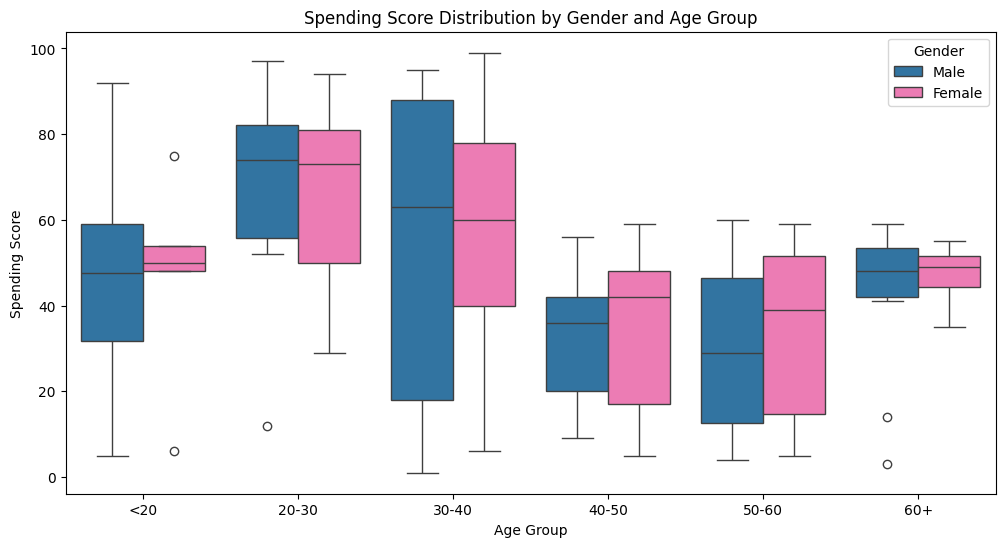

In [27]:
#Plotting boxplot for Spending Score Distribution by Gender and Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', hue='Gender', data=Mall_Customers,  palette={'Male': '#1f77b4', 'Female': '#ff69b4'})
plt.title('Spending Score Distribution by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()

##### From the boxplot above, the 30-40 age group for males shows the highest variability in spending scores, as shown by the wider range and interquartile range in the box plot. This suggests that within this group, there is a significant difference in spending behaviours and less consistent compared to others.